<a href="https://colab.research.google.com/github/BENDASAIKARTHIK/ML-PRACTICUM/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


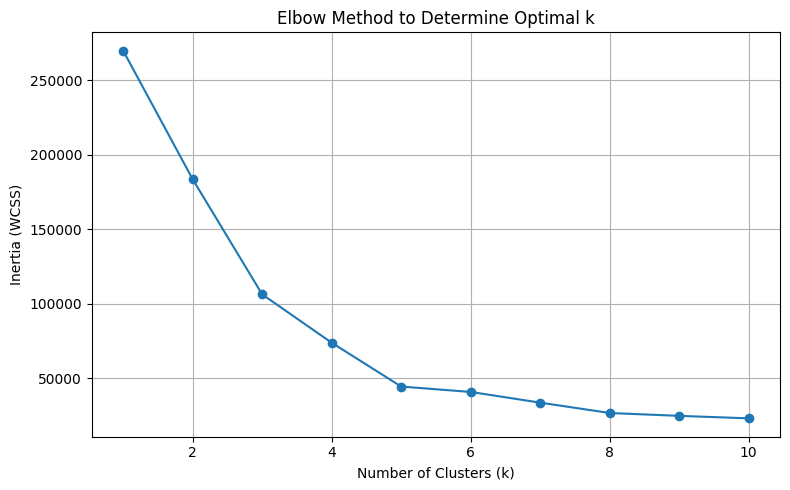

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset (make sure the CSV is in the same directory as this script)
df = pd.read_csv("Mall_Customers.csv")

# Select features: Annual Income and Spending Score
X = df.iloc[:, [3, 4]].values  # Assuming 4th and 5th columns are 'Annual Income' and 'Spending Score'

# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()


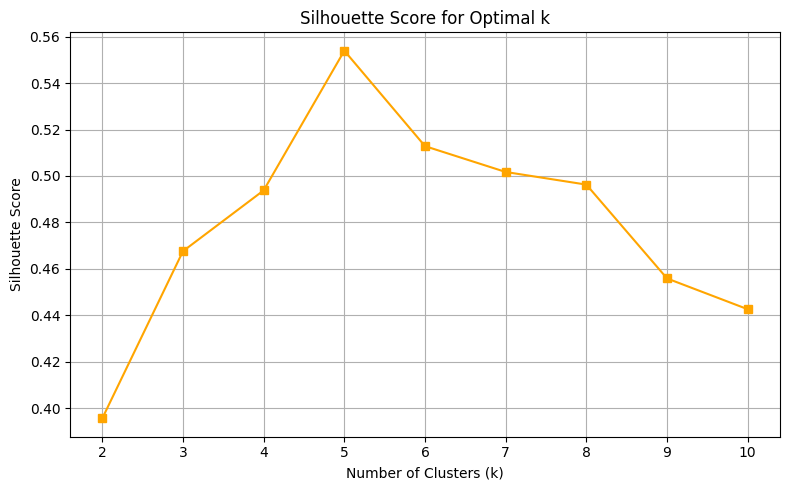

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select features: Annual Income and Spending Score
X = df.iloc[:, [3, 4]].values  # Columns 4 and 5 are assumed to be 'Annual Income' and 'Spending Score'

# Silhouette Analysis
silhouette_scores = []
K_range = range(2, 11)  # Start from k=2, because silhouette is undefined for k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


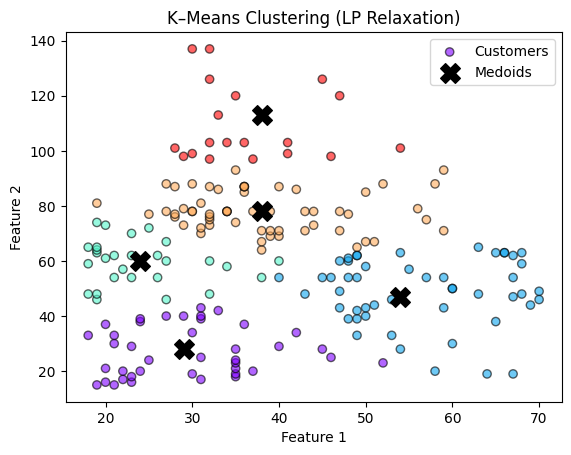

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Using columns like Annual Income and Spending Score
n = X.shape[0]
k = 5  # Number of clusters

# Compute squared distances (L2^2)
D_squared = cdist(X, X, metric='sqeuclidean')

# Define decision variables
z = cp.Variable(n)                # Relaxed cluster selection
y = cp.Variable((n, n))           # Relaxed assignment probabilities

# Constraints
constraints = [
    cp.sum(z) == k,
    cp.sum(y, axis=1) == 1,
    y >= 0,
    z >= 0,
    y <= cp.reshape(z, (1, n), order="C")
]

# Objective: Minimize squared distance cost
objective = cp.Minimize(cp.sum(cp.multiply(D_squared, y)))
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Select top-k centers and assign points
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label='Customers')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label='Medoids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K–Means Clustering (LP Relaxation)")
plt.legend()
plt.show()


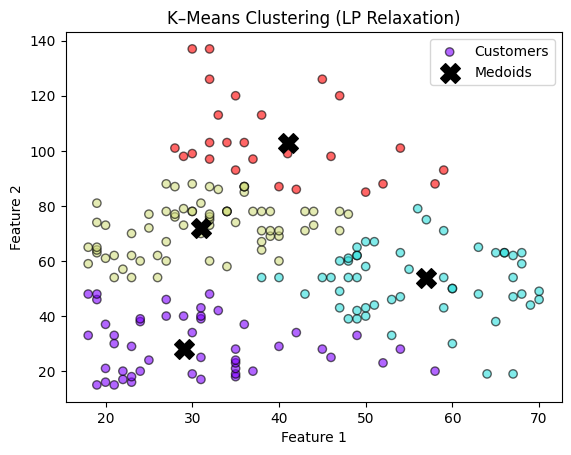

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Using columns like Annual Income and Spending Score
n = X.shape[0]
k = 4  # Number of clusters

# Compute squared distances (L2^2)
D_squared = cdist(X, X, metric='sqeuclidean')

# Define decision variables
z = cp.Variable(n)                # Relaxed cluster selection
y = cp.Variable((n, n))           # Relaxed assignment probabilities

# Constraints
constraints = [
    cp.sum(z) == k,
    cp.sum(y, axis=1) == 1,
    y >= 0,
    z >= 0,
    y <= cp.reshape(z, (1, n), order="C")
]

# Objective: Minimize squared distance cost
objective = cp.Minimize(cp.sum(cp.multiply(D_squared, y)))
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Select top-k centers and assign points
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label='Customers')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label='Medoids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K–Means Clustering (LP Relaxation)")
plt.legend()
plt.show()


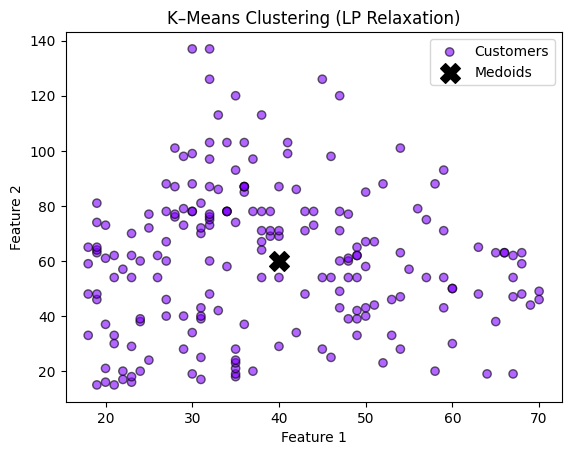

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Using columns like Annual Income and Spending Score
n = X.shape[0]
k = 1 # Number of clusters

# Compute squared distances (L2^2)
D_squared = cdist(X, X, metric='sqeuclidean')

# Define decision variables
z = cp.Variable(n)                # Relaxed cluster selection
y = cp.Variable((n, n))           # Relaxed assignment probabilities

# Constraints
constraints = [
    cp.sum(z) == k,
    cp.sum(y, axis=1) == 1,
    y >= 0,
    z >= 0,
    y <= cp.reshape(z, (1, n), order="C")
]

# Objective: Minimize squared distance cost
objective = cp.Minimize(cp.sum(cp.multiply(D_squared, y)))
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Select top-k centers and assign points
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label='Customers')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label='Medoids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K–Means Clustering (LP Relaxation)")
plt.legend()
plt.show()


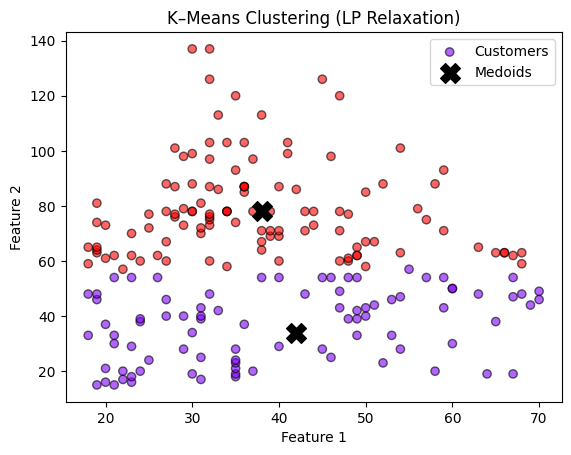

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Using columns like Annual Income and Spending Score
n = X.shape[0]
k = 2  # Number of clusters

# Compute squared distances (L2^2)
D_squared = cdist(X, X, metric='sqeuclidean')

# Define decision variables
z = cp.Variable(n)                # Relaxed cluster selection
y = cp.Variable((n, n))           # Relaxed assignment probabilities

# Constraints
constraints = [
    cp.sum(z) == k,
    cp.sum(y, axis=1) == 1,
    y >= 0,
    z >= 0,
    y <= cp.reshape(z, (1, n), order="C")
]

# Objective: Minimize squared distance cost
objective = cp.Minimize(cp.sum(cp.multiply(D_squared, y)))
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Select top-k centers and assign points
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label='Customers')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label='Medoids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K–Means Clustering (LP Relaxation)")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/cvxpy/atoms/affine/reshape.py:68: FutureWarning: 
    You didn't specify the order of the reshape expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(reshape_order_warning, FutureWarning)


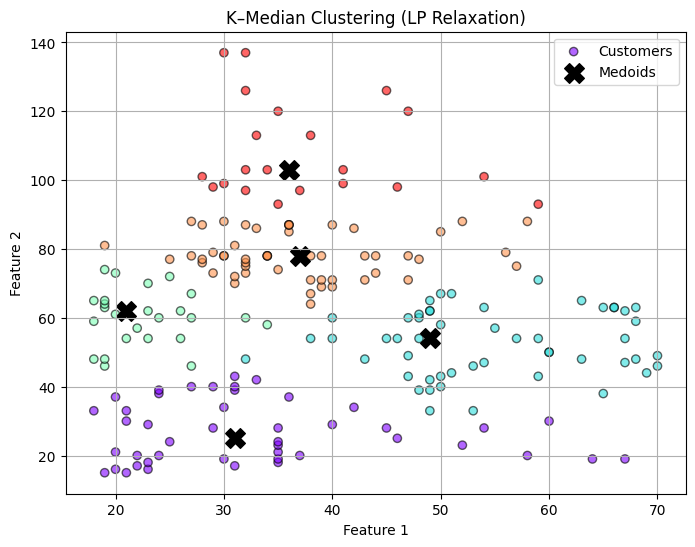

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Use 2 features for clustering (e.g., Annual Income & Spending Score)
n = X.shape[0]
k = 5  # Number of clusters

# Compute pairwise L1 distances
D = cdist(X, X, metric='cityblock')

# Define decision variables (relaxed LP)
z = cp.Variable(n)                 # Medoid selection (relaxed)
y = cp.Variable((n, n))            # Assignment matrix (relaxed)

# Define LP constraints
constraints = [
    cp.sum(z) == k,                      # Select exactly k medoids
    cp.sum(y, axis=1) == 1,              # Each point assigned to one medoid
    y >= 0,
    y <= cp.reshape(z, (1, n))           # Only assign to selected medoids
]

# Objective: minimize total distance
objective = cp.Minimize(cp.sum(cp.multiply(D, y)))

# Solve LP
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Rounding: choose k highest z-values as medoids
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label="Customers")
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label="Medoids")
plt.title("K–Median Clustering (LP Relaxation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/cvxpy/atoms/affine/reshape.py:68: FutureWarning: 
    You didn't specify the order of the reshape expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(reshape_order_warning, FutureWarning)


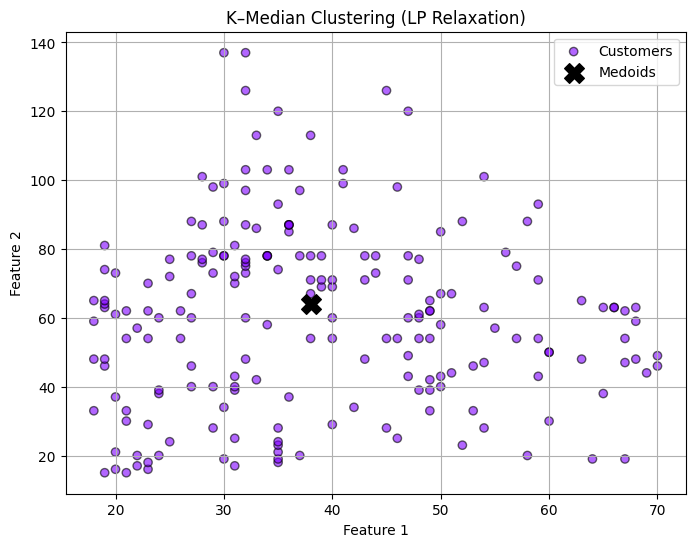

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Use 2 features for clustering (e.g., Annual Income & Spending Score)
n = X.shape[0]
k = 1  # Number of clusters

# Compute pairwise L1 distances
D = cdist(X, X, metric='cityblock')

# Define decision variables (relaxed LP)
z = cp.Variable(n)                 # Medoid selection (relaxed)
y = cp.Variable((n, n))            # Assignment matrix (relaxed)

# Define LP constraints
constraints = [
    cp.sum(z) == k,                      # Select exactly k medoids
    cp.sum(y, axis=1) == 1,              # Each point assigned to one medoid
    y >= 0,
    y <= cp.reshape(z, (1, n))           # Only assign to selected medoids
]

# Objective: minimize total distance
objective = cp.Minimize(cp.sum(cp.multiply(D, y)))

# Solve LP
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Rounding: choose k highest z-values as medoids
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label="Customers")
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label="Medoids")
plt.title("K–Median Clustering (LP Relaxation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/cvxpy/atoms/affine/reshape.py:68: FutureWarning: 
    You didn't specify the order of the reshape expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(reshape_order_warning, FutureWarning)


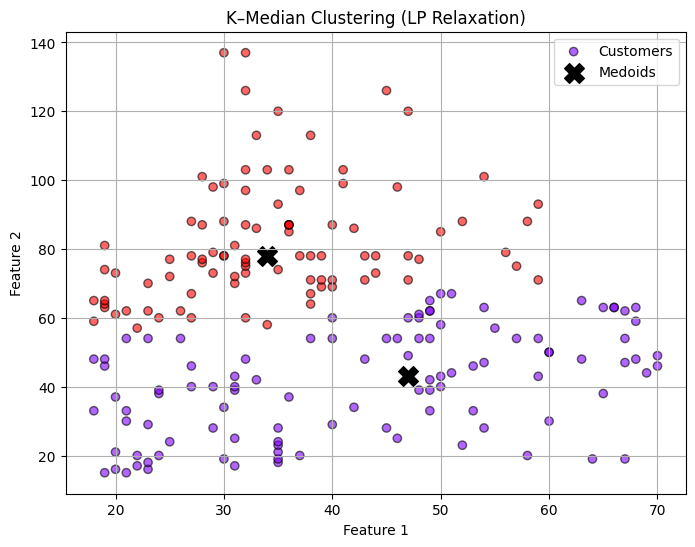

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import cvxpy as cp
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [2, 3]].values  # Use 2 features for clustering (e.g., Annual Income & Spending Score)
n = X.shape[0]
k = 2  # Number of clusters

# Compute pairwise L1 distances
D = cdist(X, X, metric='cityblock')

# Define decision variables (relaxed LP)
z = cp.Variable(n)                 # Medoid selection (relaxed)
y = cp.Variable((n, n))            # Assignment matrix (relaxed)

# Define LP constraints
constraints = [
    cp.sum(z) == k,                      # Select exactly k medoids
    cp.sum(y, axis=1) == 1,              # Each point assigned to one medoid
    y >= 0,
    y <= cp.reshape(z, (1, n))           # Only assign to selected medoids
]

# Objective: minimize total distance
objective = cp.Minimize(cp.sum(cp.multiply(D, y)))

# Solve LP
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)

# Rounding: choose k highest z-values as medoids
medoid_indices = np.argsort(z.value)[-k:]
labels = np.argmax(y.value, axis=1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.6, edgecolors='k', label="Customers")
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='black', marker='X', s=200, label="Medoids")
plt.title("K–Median Clustering (LP Relaxation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
